***
## Homework
1. Plot the vector field $q=(U,V)$ in the domain from $-1<x<1$ and $-1<y<1$ given by
     $$U=-X$$
     $$V=-Y$$

2. Use the `ExnerCalculator` function to display an erosional/deposition heatmap for the change in elevation $\Delta \eta$

3. Given the data of the three variables $weight, height$ and $age$ below, find the correlation matrix between them and make a heatmap of the correlation matrix. (check the correlation example in __[here](https://python-graph-gallery.com/90-heatmaps-with-various-input-format)__  )

4. Create a repository and put it up on your github.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [1]:
weight=[162.22, 156.12, 169.31, 179.76, 173.12, 165.66, 166.61, 170.91, 156.67, 170.94]
height=[7.8954, 7.7507, 7.7312, 7.9815, 7.8738, 7.6802, 7.7422, 7.8297, 7.8992, 7.9033]
age=[32, 33, 22, 45, 33, 49, 36, 20, 41, 25]

In [4]:
#Create vector field here

xrange=np.arange(-1,1,0.09)
yrange=np.arange(-1,1,0.09)

X,Y=np.meshgrid(xrange,yrange)

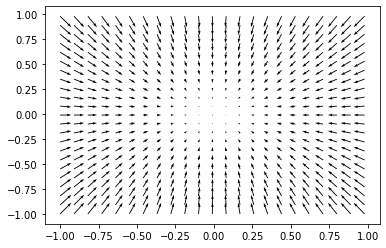

In [6]:
#define functions of the vector at every (x,y) location
def Ucomp(xmatrix,ymatrix):
    return -xmatrix

def Vcomp(xmatrix,ymatrix):
    return -ymatrix

#assing them
U=Ucomp(X,Y)
V=Vcomp(X,Y)

plt.quiver(X,Y,U,V,scale=30)
plt.show()

In [7]:
#Exner function
def ExnerCalculator(X,Y,Uq,Vq,eps=1,dt=0.1):
    """
    ExnerCalculator takes in the X and Y locations and the vector field defined by U and V and returns the
    deposition/erosion happening at the current time.
    
    Parameters
    ----------
    X: matrix 
        x locations of the flux
    Y: matrix 
        y locations of the flux
    Uq: matrix 
        first components of the flux
    Vq: matrix 
        second components of the flux
    eps: float
        1-porosity of the bed
    dt: float
        time delta for the method

    Returns
    -------
    Xs: matrix 
        x locations with n-1 locations corresponding to dh
    Ys: matrix 
        y locations with n-1 locations corresponding to dh
    dh: matrix
        The difference in elevation in dt time units based on the flux
    """
    m,n=X.shape
    dx=X[0][1]-X[0][0]
    dy=Y[1][0]-Y[0][0]

    #gradient
    dUq=[ [Uq[j][i+1]-Uq[j][i] for i in range(n-1) ] for j in range(m-1) ]
    dVq=[ [Vq[j+1][i]-Vq[j][i] for i in range(n-1) ] for j in range(m-1) ]
    
    #exner
    dh=(-dt/eps)*(dUq/dx+dVq/dy)

    #new Xs and Ys
    Xs=np.array([ [X[j][i] for i in range(n-1) ] for j in range(m-1) ])
    Ys=np.array([ [Y[j][i] for i in range(n-1) ] for j in range(m-1) ])

    return Xs,Ys,dh

## 3-Matrix

In [25]:
# Create a dataset
matrix= pd.DataFrame(list(zip(weight, height, age)),
               columns =['weight', 'height', 'age'])
matrix


,weight,height,age
0,162.22,7.8954,32
1,156.12,7.7507,33
2,169.31,7.7312,22
3,179.76,7.9815,45
4,173.12,7.8738,33
5,165.66,7.6802,49
6,166.61,7.7422,36
7,170.91,7.8297,20
8,156.67,7.8992,41
9,170.94,7.9033,25


In [26]:
corr_matrix=matrix.corr()

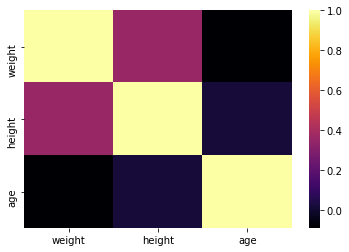

In [31]:
# plot it
sns.heatmap(corr_matrix, cmap='inferno')

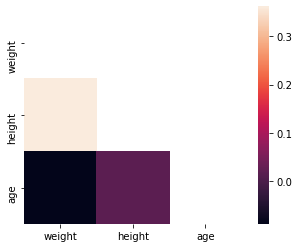

In [32]:
# plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, square=True)